# 第6章：Matplotlib 坐标轴定制练习题

姓名：徐秋莲  
学号：022340507

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# 设置中文显示 
plt.rcParams["font.sans-serif"] = ["SimHei"] 
plt.rcParams["axes.unicode_minus"] = False

## 练习 1：定制刻度位置、格式与样式

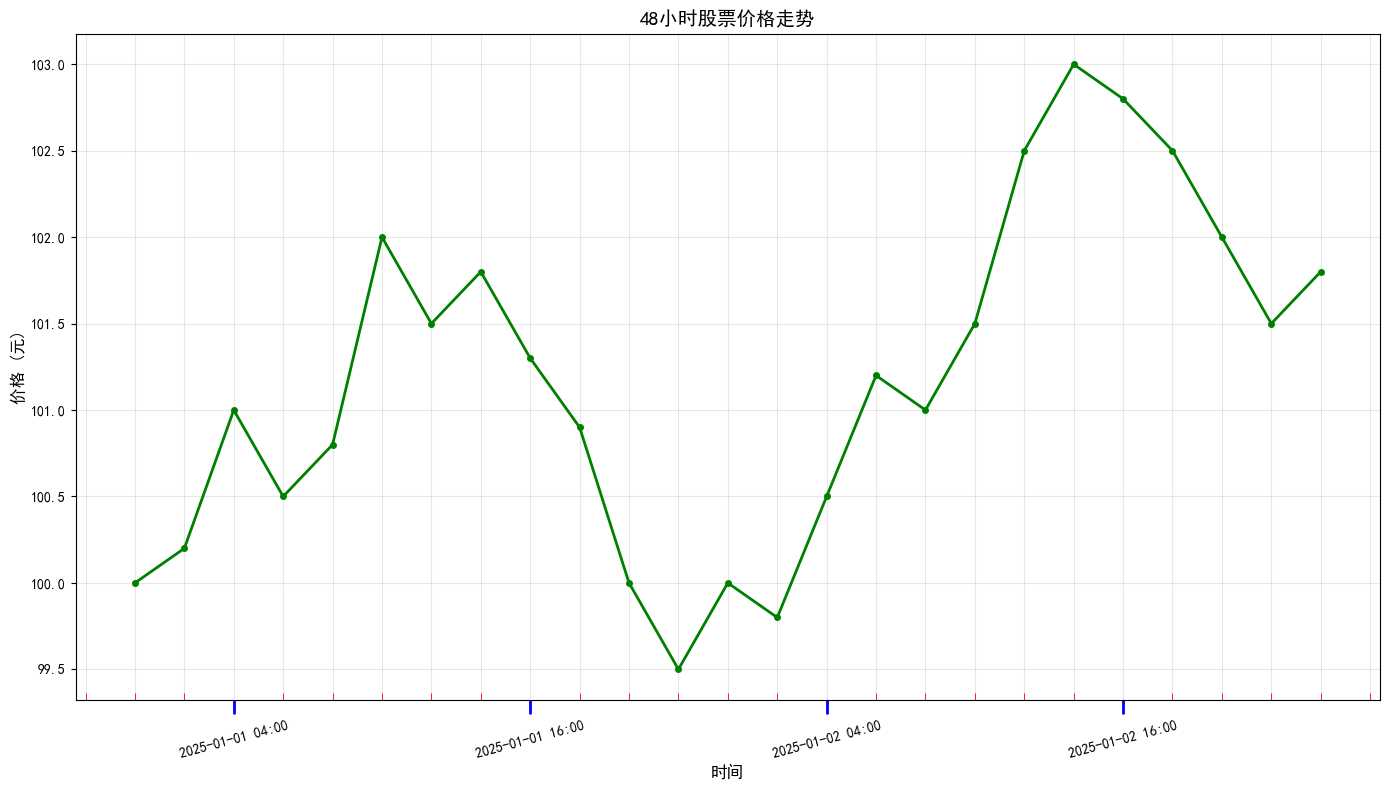

In [2]:
# 练习1数据 - 48小时股票价格
base = datetime(2025, 1, 1, 0) 
x_time = np.array([base + timedelta(hours=i*2) for i in range(25)]) 
y_price = np.array([100.0, 100.2, 101.0, 100.5, 100.8, 102.0, 101.5, 101.8, 
                   101.3, 100.9, 100.0, 99.5, 100.0, 99.8, 100.5, 101.2, 101.0, 101.5, 102.5, 
                   103.0, 102.8, 102.5, 102.0, 101.5, 101.8])

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制折线图
ax.plot(x_time, y_price, 'g-o', linewidth=2, markersize=4)

# 设置主刻度 - 每12小时
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# 设置次刻度 - 每2小时
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))

# 设置主刻度样式 - 朝外、蓝色、长10宽2、标签旋转15°
ax.tick_params(axis='x', which='major', direction='out', color='blue', 
               length=10, width=2, rotation=15, labelsize=10)

# 设置次刻度样式 - 朝内、红色、长5
ax.tick_params(axis='x', which='minor', direction='in', color='red', length=5)

# 添加网格线
ax.grid(True, alpha=0.3, which='both')

# 设置标题和轴标签
ax.set_title('48小时股票价格走势', fontsize=14, fontweight='bold')
ax.set_xlabel('时间', fontsize=12)
ax.set_ylabel('价格 (元)', fontsize=12)

# 调整布局
plt.tight_layout()
plt.show()

## 练习 2：添加图内坐标轴

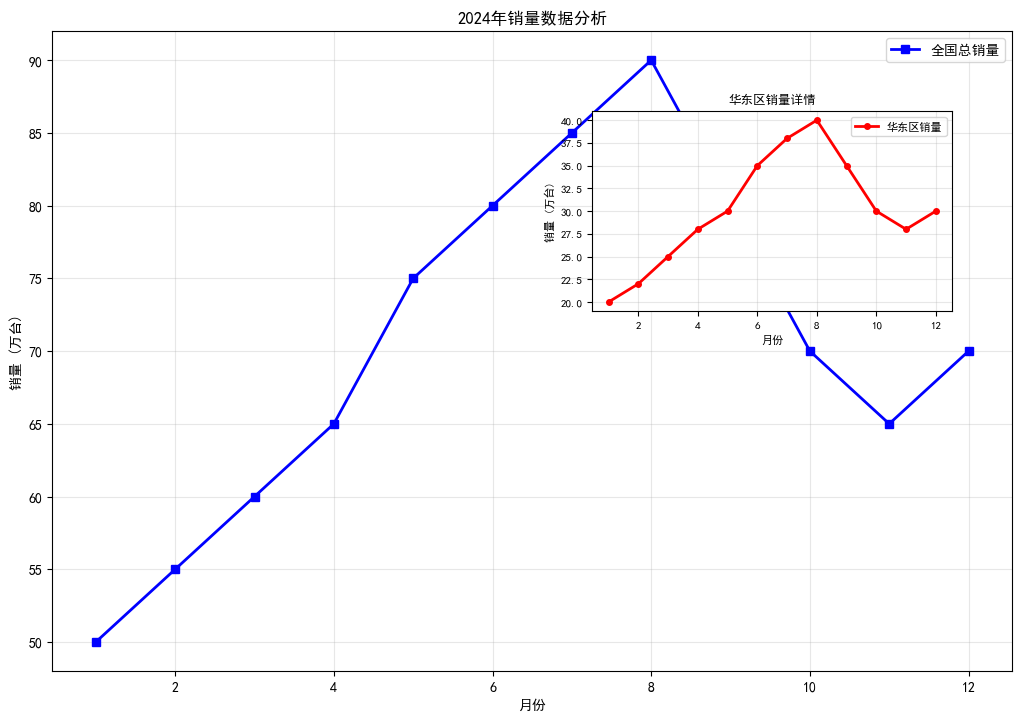

In [3]:
# 练习2数据 - 销量数据
x_all = np.arange(1, 13) 
y_all_sales = np.array([50, 55, 60, 65, 75, 80, 85, 90, 80, 70, 65, 70]) 
y_east_sales = np.array([20, 22, 25, 28, 30, 35, 38, 40, 35, 30, 28, 30])

# 创建主图表
fig = plt.figure(figsize=(12, 8))

# 主坐标轴 - 全国总销量
ax_main = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax_main.plot(x_all, y_all_sales, 'b-s', linewidth=2, markersize=6, label='全国总销量')
ax_main.set_xlabel('月份')
ax_main.set_ylabel('销量 (万台)')
ax_main.set_title('2024年销量数据分析')
ax_main.grid(True, alpha=0.3)
ax_main.legend()

# 嵌入小图 - 华东区销量
ax_small = fig.add_axes([0.55, 0.55, 0.3, 0.25])
ax_small.plot(x_all, y_east_sales, 'r-o', linewidth=2, markersize=4, label='华东区销量')
ax_small.set_xlabel('月份', fontsize=8)
ax_small.set_ylabel('销量 (万台)', fontsize=8)
ax_small.set_title('华东区销量详情', fontsize=9)
ax_small.tick_params(labelsize=8)
ax_small.legend(fontsize=8)
ax_small.grid(True, alpha=0.3)

plt.show()

## 练习 3：隐藏部分轴脊

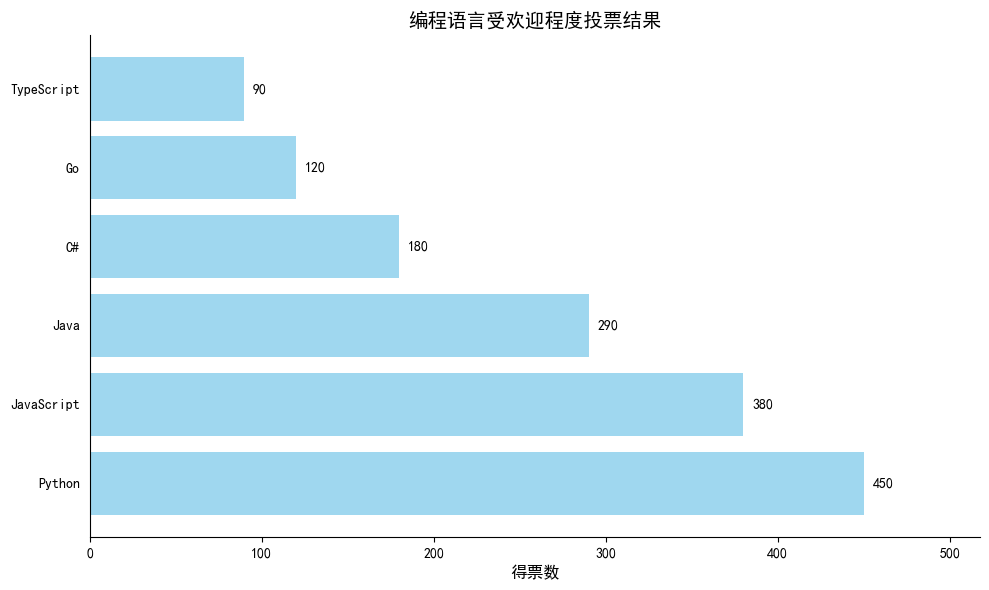

In [4]:
# 练习3数据 - 编程语言投票
languages = ['Python', 'JavaScript', 'Java', 'C#', 'Go', 'TypeScript'] 
y_pos = np.arange(len(languages)) 
votes = np.array([450, 380, 290, 180, 120, 90])

# 创建图表
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制水平条形图
bars = ax.barh(y_pos, votes, color='skyblue', alpha=0.8)

# 设置Y轴刻度标签
ax.set_yticks(y_pos)
ax.set_yticklabels(languages)

# 隐藏顶部和右侧轴脊
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 隐藏Y轴刻度线
ax.tick_params(axis='y', which='both', left=False)

# 添加得票数值标签
for i, (bar, vote) in enumerate(zip(bars, votes)):
    ax.text(vote + 5, i, str(vote), va='center', fontsize=10, fontweight='bold')

# 设置标题和轴标签
ax.set_title('编程语言受欢迎程度投票结果', fontsize=14, fontweight='bold')
ax.set_xlabel('得票数', fontsize=12)

# 调整X轴范围以容纳数值标签
ax.set_xlim(0, max(votes) * 1.15)

plt.tight_layout()
plt.show()

## 练习 4：移动轴脊到数据中心

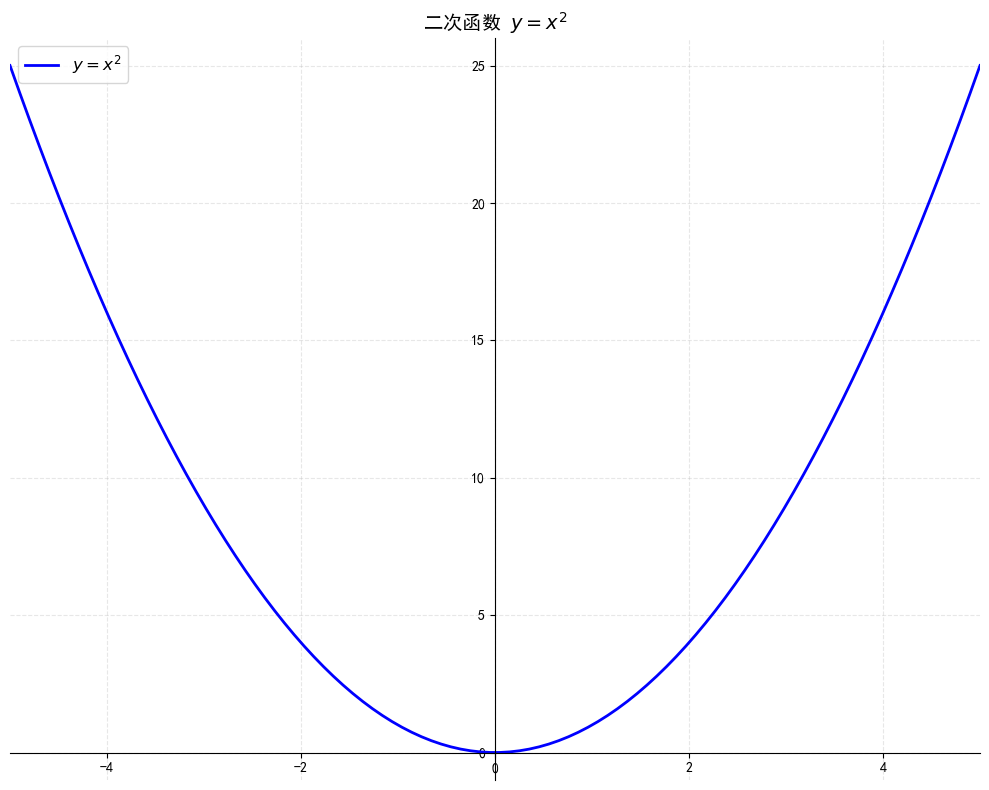

In [5]:
# 练习4数据 - 二次函数
x = np.linspace(-5, 5, 100) 
y = x**2

# 创建图表
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制二次函数
ax.plot(x, y, 'b-', linewidth=2, label='$y = x^2$')

# 隐藏顶部和右侧轴脊
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 将轴脊移动到原点
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# 设置坐标轴范围
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 26)

# 设置刻度位置
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 添加标题和图例
ax.set_title('二次函数 $y = x^2$', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=12)

# 添加网格线
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 练习 5：综合定制（轴脊+刻度）

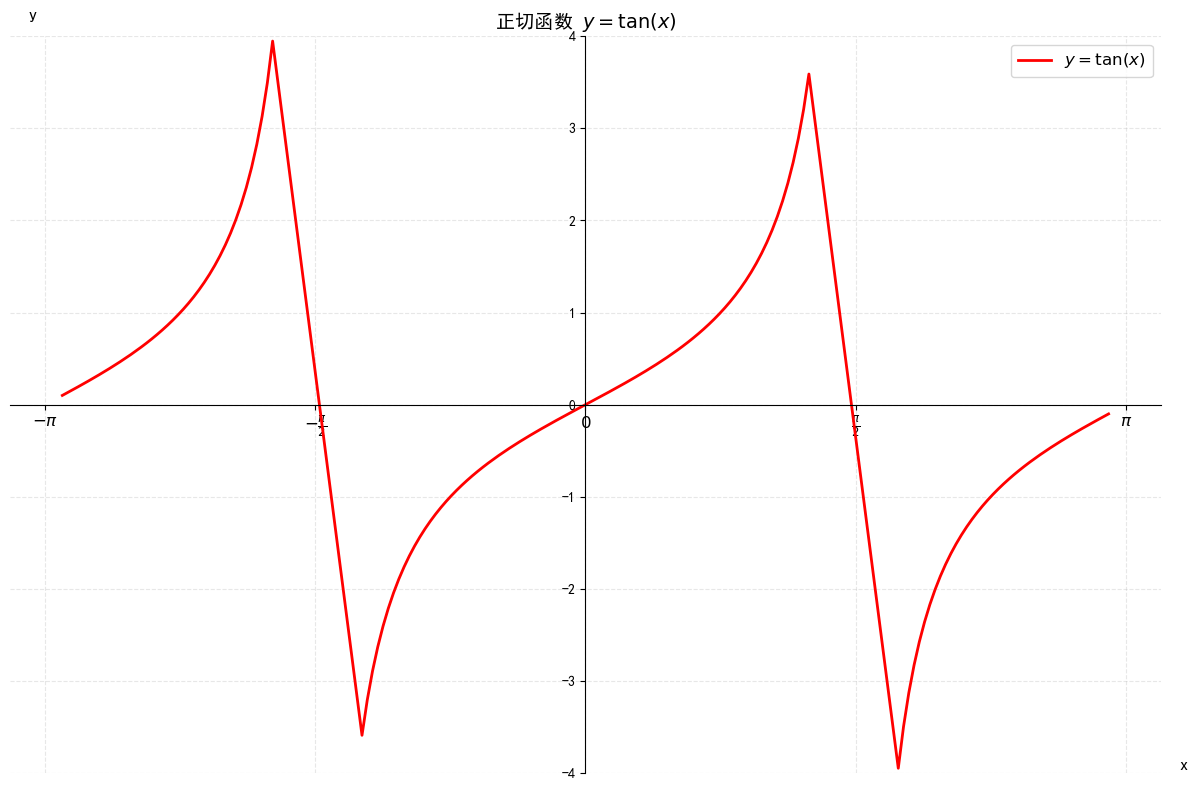

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 正切函数数据
x = np.linspace(-np.pi + 0.1, np.pi - 0.1, 200) 
y = np.tan(x)

# 创建图表
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制正切函数（添加线条中断处理，避免无穷值连线）
mask = np.abs(y) < 4  # 只显示y在[-4,4]范围内的点
ax.plot(x[mask], y[mask], 'r-', linewidth=2, label=r'$y = \tan(x)$')

# 隐藏顶部和右侧轴脊
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 将轴脊移动到原点
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# 设置Y轴范围
ax.set_ylim(-4, 4)

# 设置X轴刻度（使用原始字符串r''避免转义错误）
x_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
x_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=12)

# 设置刻度位置
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 添加网格线
ax.grid(True, alpha=0.3, linestyle='--')

# 添加标题和图例
ax.set_title(r'正切函数 $y = \tan(x)$', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)

# 修复坐标轴标签设置（移除冲突的loc参数）
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12, rotation=0)

# 调整标签位置（避免与轴脊重叠）
ax.xaxis.set_label_coords(1.02, 0.02)
ax.yaxis.set_label_coords(0.02, 1.02)

plt.tight_layout()
plt.show()